# Fremstilling av Utslipp

Behandling av data:



In [1]:


import sys  
import pandas as pd
import os

if os.getcwd().split(os.path.sep)[-1] == "processed_data":
    os.chdir("..")

from src.Utslipp import analyze_clean_utslipp_data, statitics_plot, plots_part_2 ,MissingValues


file_path_utslipp = "raw_data/data/Utslippdata.csv"
df = pd.read_csv(file_path_utslipp)

df_clean = analyze_clean_utslipp_data(df)
plotter = statitics_plot(df_clean)
plotters = plots_part_2(df)




##### Dataanalyse

Vi ser at datasettet består gruppevis, av 5 kolonner som inneholder både object og int elementer. Gjennomsnittlig utslipp de føste årene er rundt 9000-1000 tonn CO2. Mens median de første årene er cirka 7000 tonn CO2.


In [2]:
print(df.head(),df.dtypes)
print (df.groupby('år')['verdi'].mean().head())
print(df.groupby('år')['verdi'].median().head())



           kilde energiprodukt                komponent    år  \
0  0 Alle kilder     VT0 I alt  K11 Karbondioksid (CO2)  2013   
1  0 Alle kilder     VT0 I alt  K11 Karbondioksid (CO2)  2014   
2  0 Alle kilder     VT0 I alt  K11 Karbondioksid (CO2)  2015   
3  0 Alle kilder     VT0 I alt  K11 Karbondioksid (CO2)  2016   
4  0 Alle kilder     VT0 I alt  K11 Karbondioksid (CO2)  2017   

                                  statistikkvariabel  verdi  
0  Utslipp til luft (1 000 tonn CO2-ekvivalenter,...  44539  
1  Utslipp til luft (1 000 tonn CO2-ekvivalenter,...  44975  
2  Utslipp til luft (1 000 tonn CO2-ekvivalenter,...  45523  
3  Utslipp til luft (1 000 tonn CO2-ekvivalenter,...  44708  
4  Utslipp til luft (1 000 tonn CO2-ekvivalenter,...  44197   kilde                 object
energiprodukt         object
komponent             object
år                     int64
statistikkvariabel    object
verdi                  int64
dtype: object
år
2013     9897.666667
2014     9994.555556
2015

##### Visualisering av gjennomsnittlige totalutlipp per år 

Figur 1: gir en oversikt over Co2 utslipp over tid ved bruk av gjennomsnitt. Gjenomsnittet gir middelverdi representasjon av utslippene per år. På figuren kan vi se at 2015 har høyest gjennomsnittlige CO2-utslippen, mens 2023 har den laveste gjennomsnittlige CO2 utslippen. 


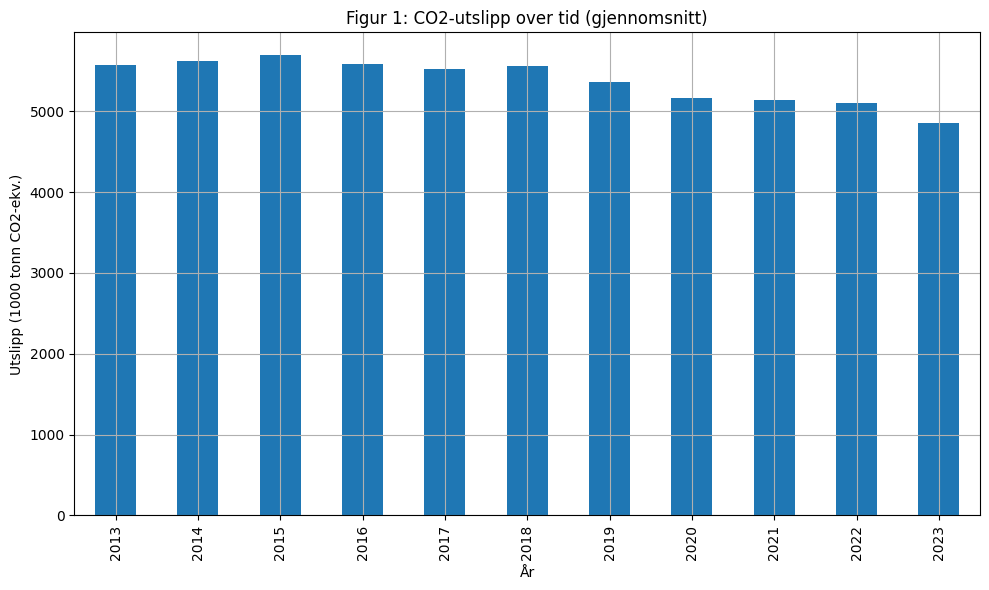

In [3]:
mean = plotter.plot_co2_per_year_mean()


##### Visualisering av CO2 utslipp over tid i median

Figur 2: Gir ett annen innblikk på utslippet i median. Ved bruk av median vil ikke ekstremverdier forsvinne og vil gi et mer representivt fremstilling av utslippet. Vi ser dermed at den største andelen av utslippen foregår i 2018. Dette skiller seg fra figur 1.

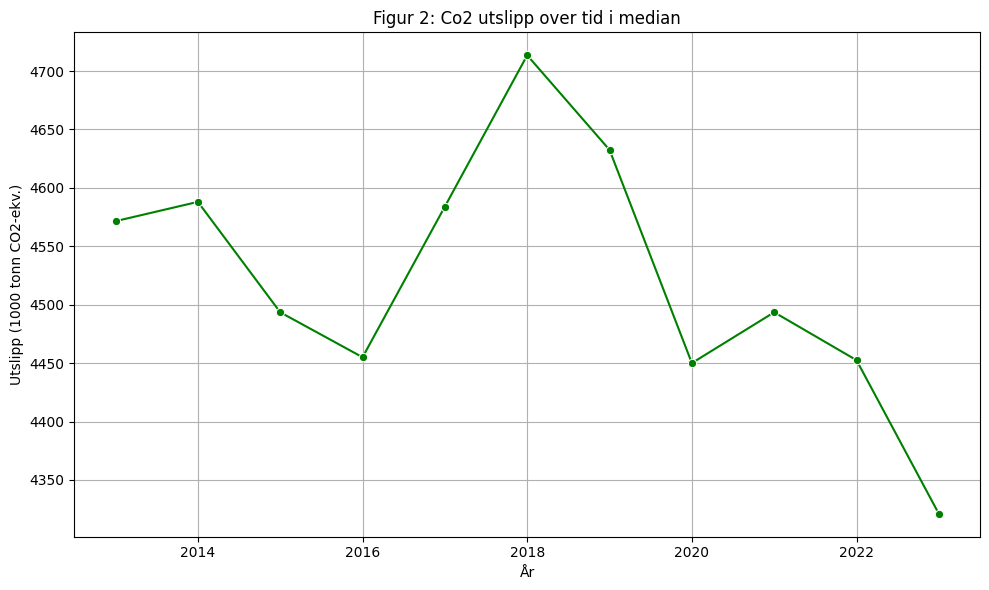

In [4]:
plotter.plot_co2_per_year_median()

##### Gjennomsnittlige CO2-utslipp per kilde 

På figur 3 fremstilles den gjennomsnittlige Co2-utslipp per kilde. Her ser vi at Olje-og gassutvinning utgjør den gjennomsnittlige største utslippen per tid. Vi ser også at det er andre kilder som også bidrar til et stor andel av utslipp som Industri og bergverk og veitrafrikk. Jordbruk utgjør en minimal andel av Co2 utslipp. 

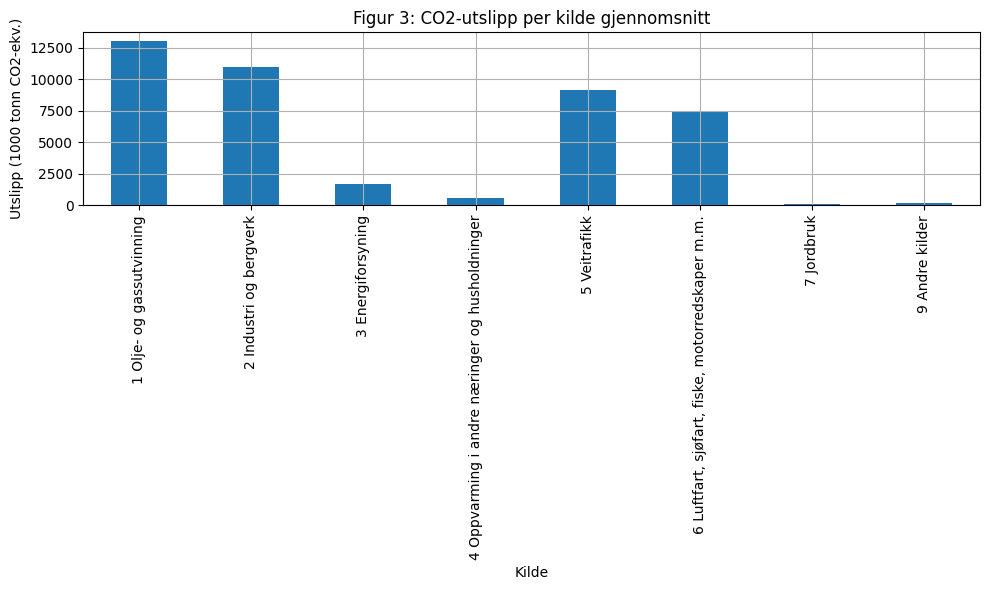

In [5]:
plotter.plot_co2_per_source_mean()

##### CO2-utslipp av per kilde i standardavvik

På figur 4 kan vi se CO2-utslipp per kilde i standardavvik. Standardavvik er et mål på datakvalitet og jevnhet. På figur 4 kan vi se at olje og gassutvinning har størst avvik. Dette kan tyde på at Olje- og gassutvinningen har historisk redusert utslippen. Industri og bergverk har lavt avvik som kan bety den har historisk lite forandring på utslippen gjennom årene. 


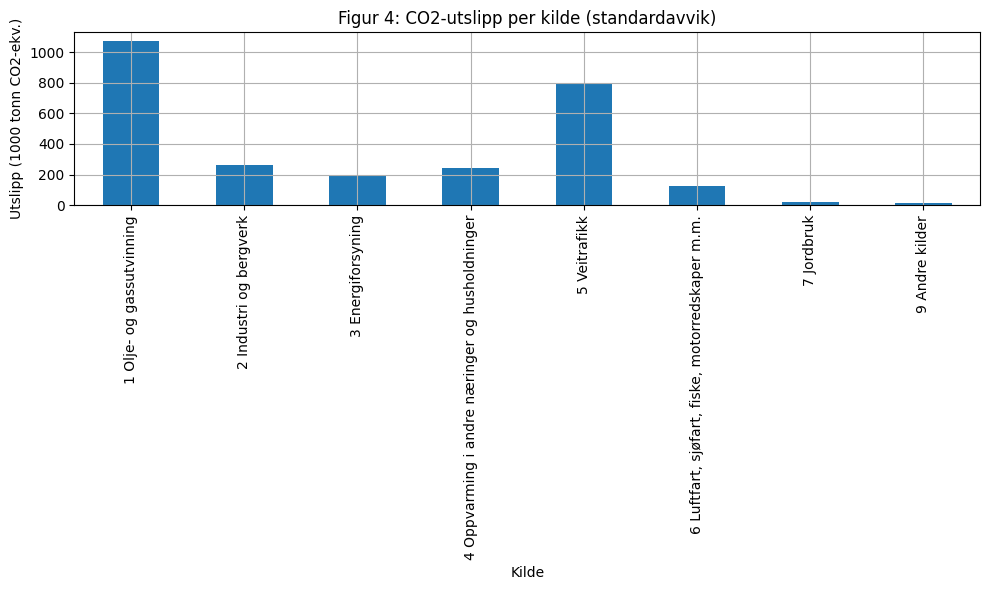

In [6]:
std = plotter.plot_co2_per_year_std()


##### Varmekart over kilder, år og mengden av utslipp

På figur 5 fremstilles all dataen på et varmekart. Hensikten til figuren er å se forholdet av utslipp mellom de ulike kildene per år. Vi ser for eksempel at noen kilder har høyt utslipp i perioden 2013-2023 som Industri og bergverk. Figur 5 viser log av utslippene slik at forholdet kan leses lettere.

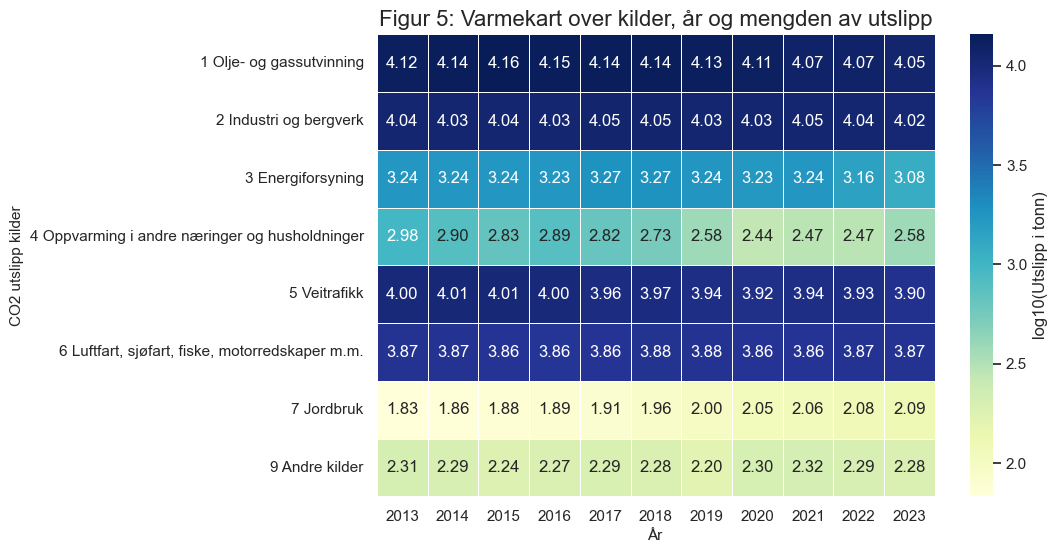

In [7]:
plotter.plot_co2_source_year_hm()


##### Lineær regresjon

I denne fremstilles lineær regresjon ved bruk av to metoder. Den grønne linjen er en modell som trener på 50 % av datasetett. Vi ser at den grønne linjen følger trenden til den synkende Co2 utslippet over tid. I likhet med den røde linjen som som også viser det samme.  Årsaken til at de likevel ikke har lik stigning kan være på grunn av den grønne linjen brukte 50 % av dataene for å trenes opp. Dette kan føre til ekstrem bratt og skjevheter. 100 % prediskjonenen er mer realistisk og fremstiller dataen mer stabilt. R2 skåren for 


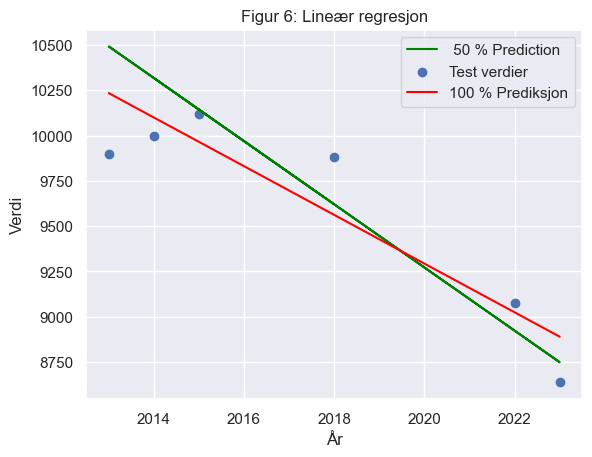

r2 (50% testdata) =  0.6870286803599372


(StandardScaler(),
 LinearRegression(),
       år
 0   2013
 1   2014
 2   2015
 3   2016
 4   2017
 5   2018
 6   2019
 7   2020
 8   2021
 9   2022
 10  2023,
 array([[-1.58113883],
        [-1.26491106],
        [-0.9486833 ],
        [-0.63245553],
        [-0.31622777],
        [ 0.        ],
        [ 0.31622777],
        [ 0.63245553],
        [ 0.9486833 ],
        [ 1.26491106],
        [ 1.58113883]]))

In [8]:
plotters = plots_part_2(df)
plotters.linreg_train_test()



##### Lineær regresjon av kilde og mengde av utslipp

I figur 7 fremstilles dataen som en barplot. Modellen gir en grov oversikt for bekreftelse av gjennoomsnitts utslippet per kilde og visualisert på figur 3.

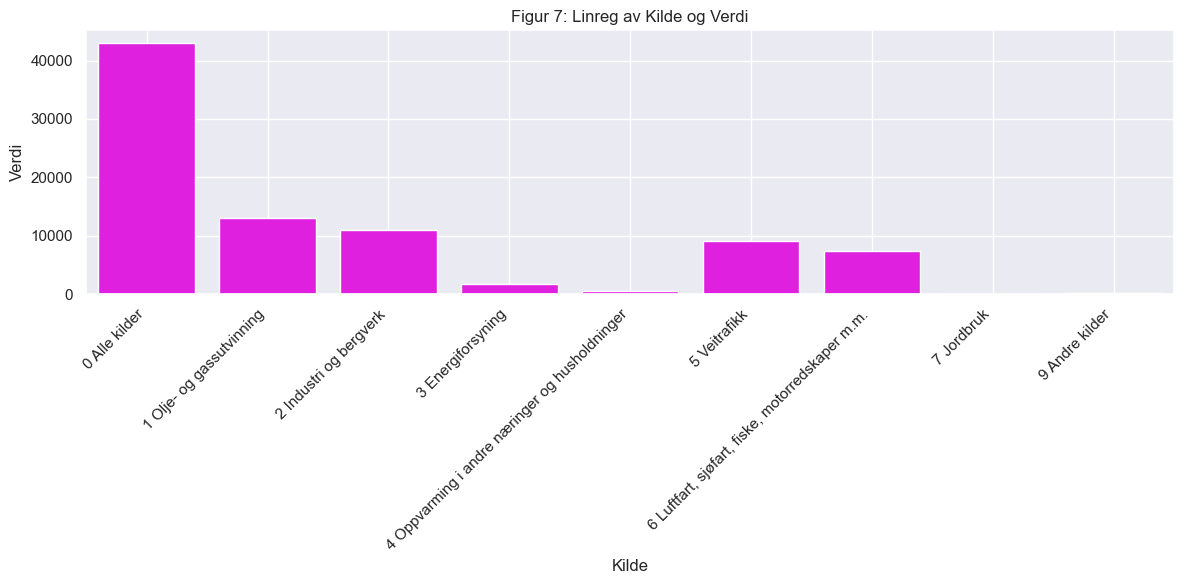

In [9]:
plotters = plots_part_2(df)
plotters.barplot()


##### Fremtids prediksjon

I denne figuren fremstilles regresjon av 2013-2023 og fremtids prediksjon de neste 10 årene. Vi ser at figuren følger samme trend som den har gjort de siste årene. Vi kan bruke widgets til å se hvor mange år frem i tid vi ønsker å undersøke. Vi ser også R2 score på rundt 0.687. Dette betyr at modellen forklarer rundt omrent 69 % av variasjon i testdatasettet. Se bort fra figur 6 som plottes igjen.


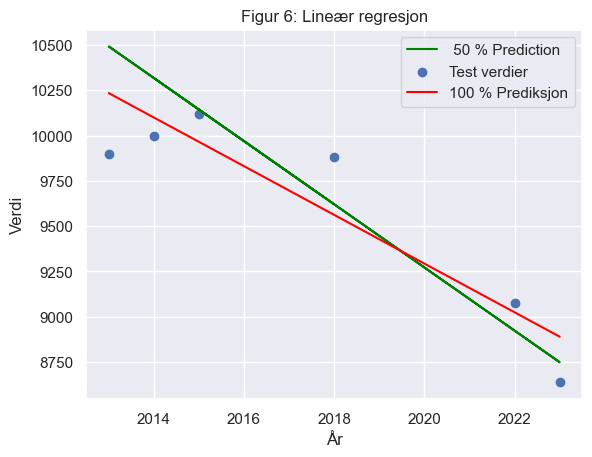

r2 (50% testdata) =  0.6870286803599372


interactive(children=(IntSlider(value=2024, continuous_update=False, description='Velg år:', max=2033, min=202…

In [ ]:
plotters = plots_part_2(df)
scaler_full, model_full, X, X_scaled_full = plotters.linreg_train_test() 
plotters.futureplot(scaler_full, model_full, X, X_scaled_full)


##### Dataens ytelse

I den siste figuren tester vi dataen ytelse. Vi fjernder verdier og bruker linære regresjon til å imputerer verdier. Fremstillignen viser en scatterplot som er fullstendig rader. Grønne linjen viser verider som har vært imputert.

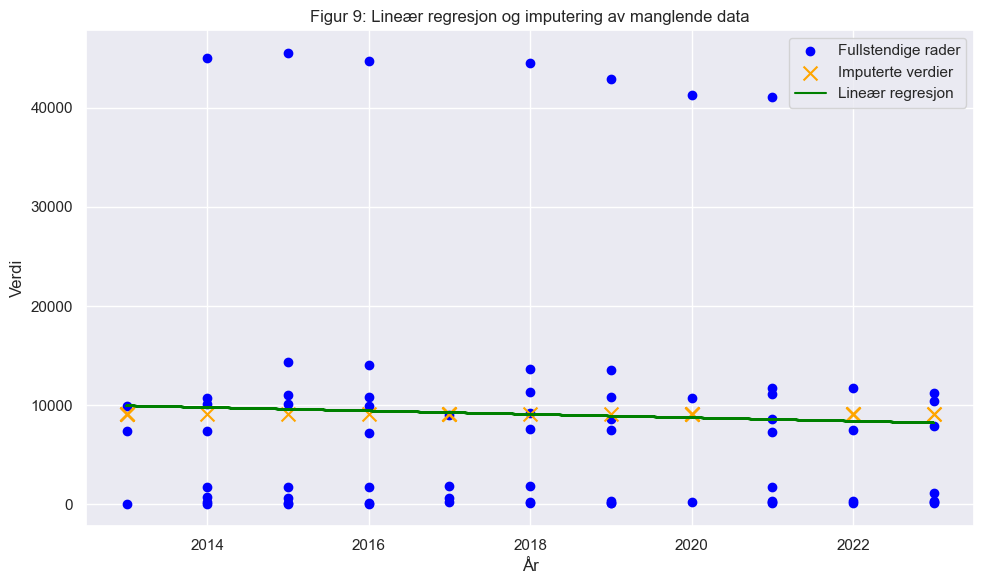

In [11]:
mv = MissingValues(df, legg_til_nans=True, andel_nans=0.3)
mv.plot_missing_data()
